In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import set_config
import seaborn as sns
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')
set_config(transform_output="pandas")

In [11]:
target_column = "num_sold"

In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 150)

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

data = pd.concat([train, test]).reset_index(drop=True)
data_copy = data.copy()

In [6]:
data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


A lot of data for us here. Around 200K of purely training set. Smaller folds would be ok i think. Interestingly, we have 8,000 num_sold missing from train data. Other than that, no missing values for other features. Additionally, num_sold is purely integers which does make sense.

<Axes: xlabel='store', ylabel='count'>

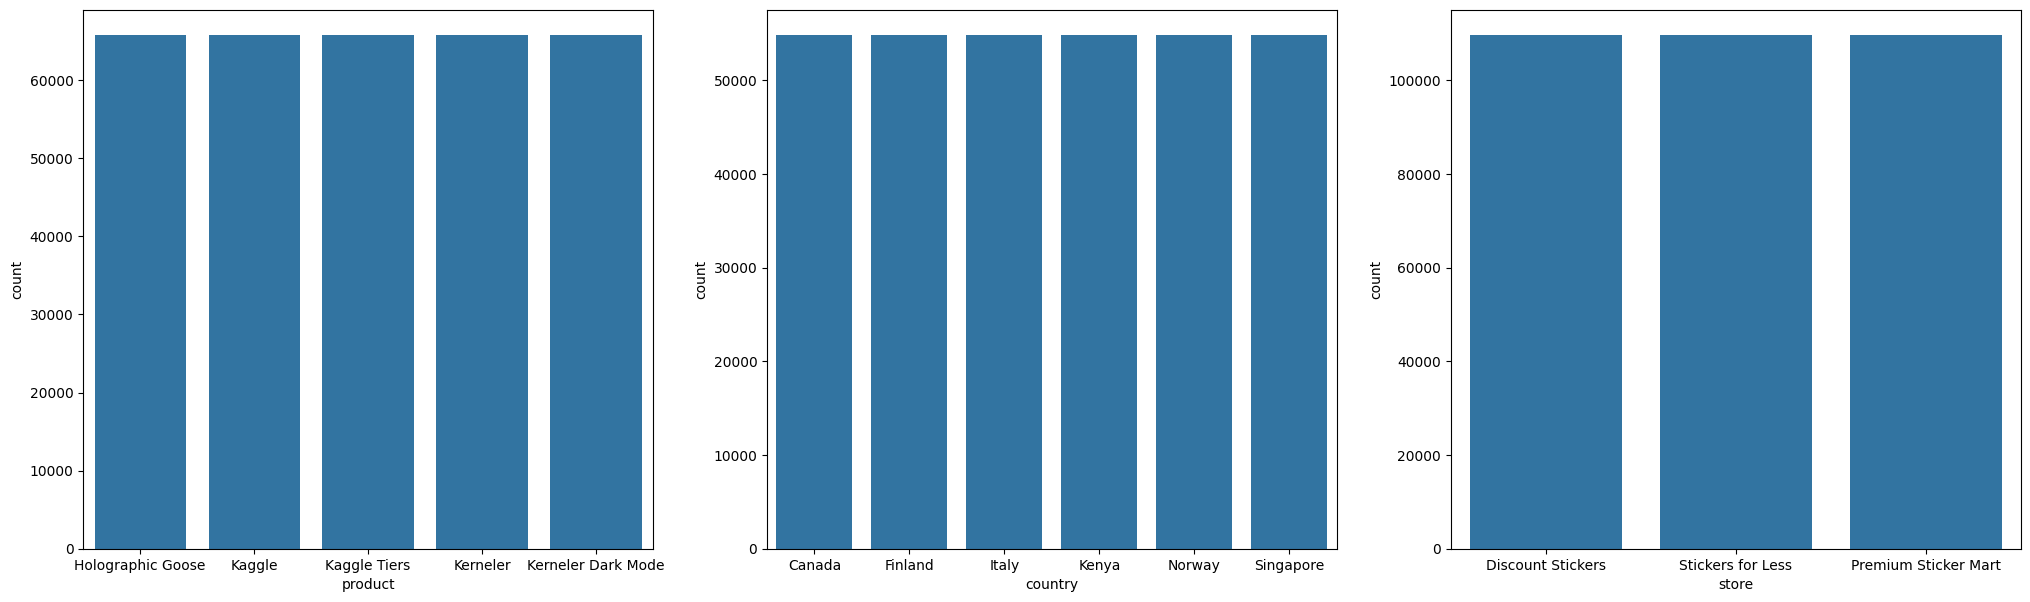

In [ ]:
fig, axs = plt.subplots(figsize=(25,7), ncols=3)

sns.countplot(data, x="product", ax=axs[0])
sns.countplot(data, x="country", ax=axs[1])
sns.countplot(data, x="store", ax=axs[2])

Distribution of the 3 categories across the train and test set are similar. 

<Axes: xlabel='num_sold'>

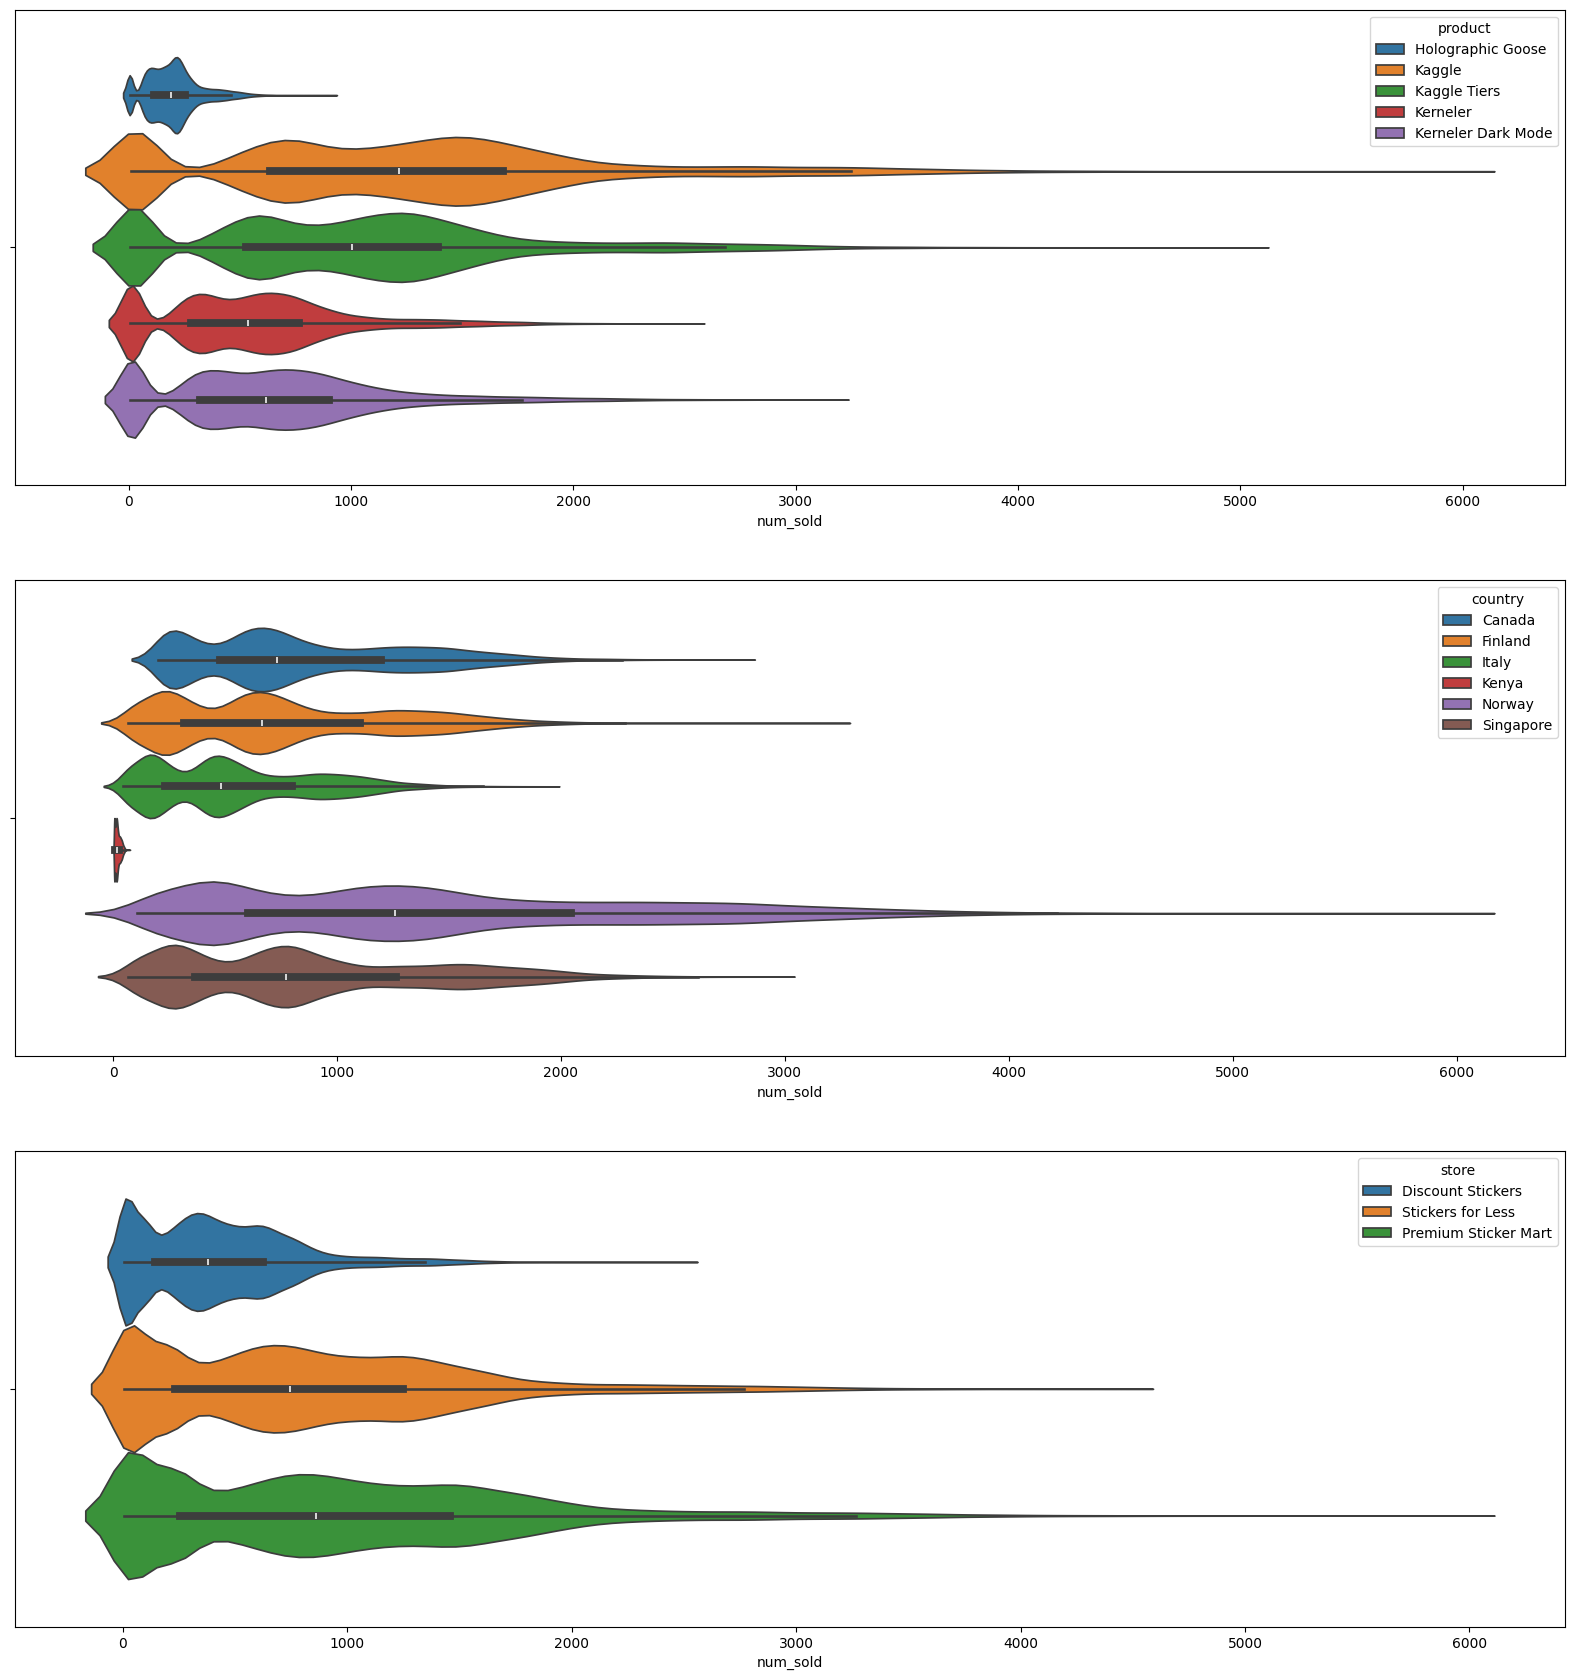

In [ ]:
fig, axs = plt.subplots(figsize=(20,21), nrows=3)

sns.violinplot(data, x=target_column, hue="product",ax=axs[0])
sns.violinplot(data, x=target_column, hue="country",ax=axs[1])
sns.violinplot(data, x=target_column, hue="store",ax=axs[2])

Interestingly, U.S is not on this list of countries. Additionally, sticker sales go down as expected but quickly rise up again. This could be because there are bulk stickers sales which adds up to the count. Holographic Goose is the most unpopular on this list. Kenya has barely any sales. Premium Sticker Mart is the most popular store.

<Axes: xlabel='store', ylabel='count'>

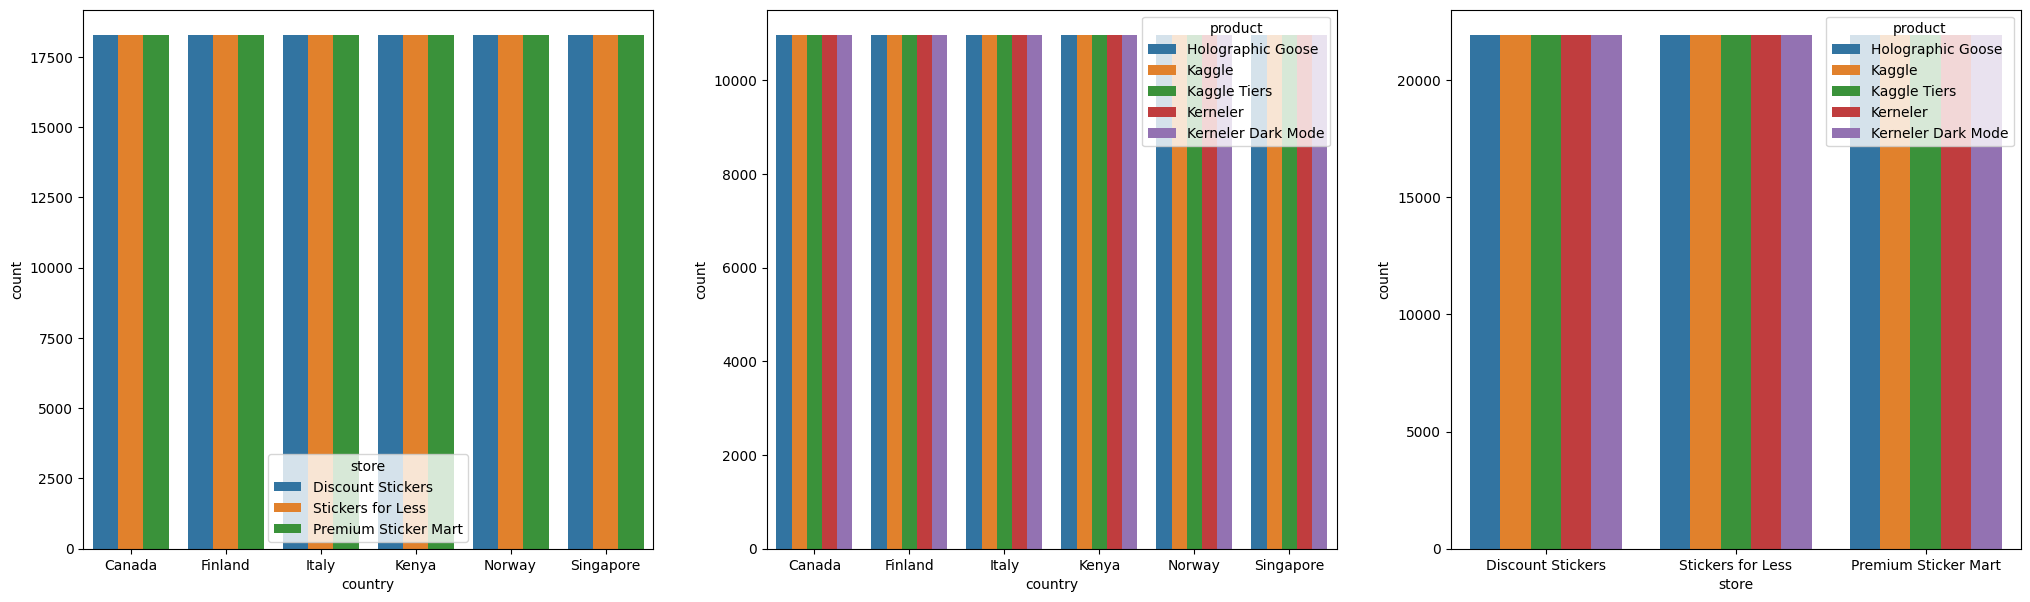

In [36]:
fig, axs = plt.subplots(figsize=(25,7), ncols=3)

sns.countplot(data, x="country", hue="store",ax=axs[0])
sns.countplot(data, x="country", hue="product",ax=axs[1])
sns.countplot(data, x="store", hue="product",ax=axs[2])

Distribution of pair wise categorical features are also similar across all categories. 